# Band to band regression
This notebook reads the batch exported geotiff file of paried Landsat 7 and Landsat 8 images and convert the pixel values to vaex dataframe.
Both Ordinary Least Square (OLS) Regression Model and Reduced Major Axis Regression (RMA) Model.
RMA was calculated using the python package from https://github.com/OceanOptics/pylr2.

Users will need to change the input and output folder. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #, r2_score
from scipy import stats
import seaborn as sns
import vaex as vx
from pylr2 import regress2
from geopyfsn import getBand

blue

In [31]:
folderPath = r"/data/shunan/data/harmonize_data/201305_08landsat/blue"
L8, L7 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L7': L7})
df = vx.from_pandas(df)
del L7,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


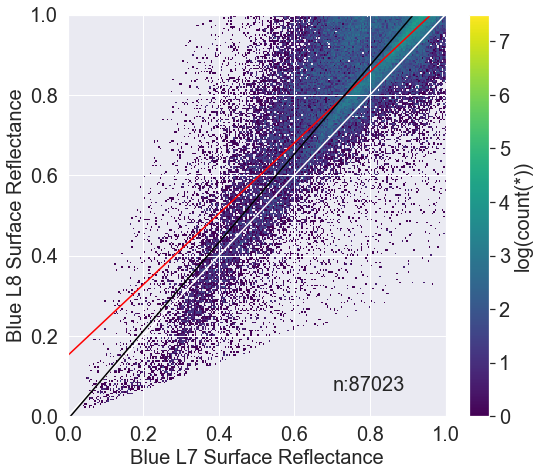

OLS: 
y=0.8827x+0.1510
OLS_r:0.80, p:0.000, n:87023
RMA: 
y=1.1017x+-0.0084
RMA_r:0.80
RMSE is 0.1358


In [32]:

# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L7.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L7.values)
rma_results = regress2(df.L7.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
sns.set_theme(style="darkgrid")
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )
# scatter plot  
df.viz.heatmap(df.L7, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=7.5,
    xlabel='Blue L7 Surface Reflectance', ylabel='Blue L8 Surface Reflectance')
ax.set_aspect('equal', 'box')
fig.savefig('print/L7L8/Blue.jpg', dpi=300)

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L7.values, squared=False)))

In [33]:
# sns.residplot(x=df.L7.values, y=df.L8.values)


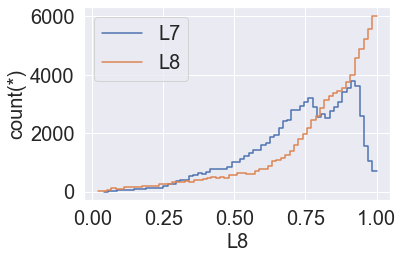

In [34]:
df.viz.histogram(x=df.L7, label='L7')   
df.viz.histogram(x=df.L8, label='L8')   
# df.viz.histogram(x=df.L7 * 1.1017 - 0.0084, label='L7adjusted')
plt.legend()

green

In [35]:
folderPath = r"/data/shunan/data/harmonize_data/201305_08landsat/green"
# folderPath = r"/data/shunan/data/harmonize_data/201305_08landsat/green"
L8, L7 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L7': L7})
df = vx.from_pandas(df)
del L7,L8


/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


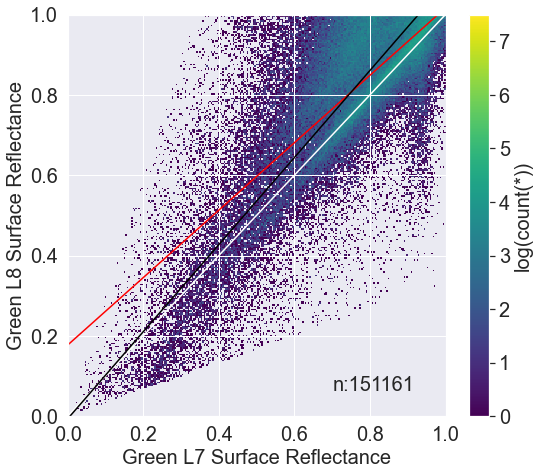

OLS: 
y=0.8395x+0.1771
OLS_r:0.77, p:0.000, n:151161
RMA: 
y=1.0840x+-0.0065
RMA_r:0.77
RMSE is 0.1286


In [36]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L7.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L7.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L7.values, df.L8.values, _method_type_2="reduced major axis")

fig, ax = plt.subplots(figsize=(8,7))
sns.set_theme(style="darkgrid")
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"
# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L7, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=7.5,
    xlabel='Green L7 Surface Reflectance', ylabel='Green L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/L7L8/Green.jpg', dpi=300)   

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L7.values, squared=False)))


In [37]:
# sns.residplot(x=df.L7.values, y=df.L8.values)

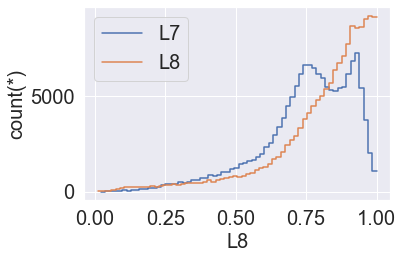

In [38]:
df.viz.histogram(x=df.L7, label='L7')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

red

In [39]:
folderPath = r"/data/shunan/data/harmonize_data/201305_08landsat/red"
L8, L7 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L7': L7})
df = vx.from_pandas(df)
del L7,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


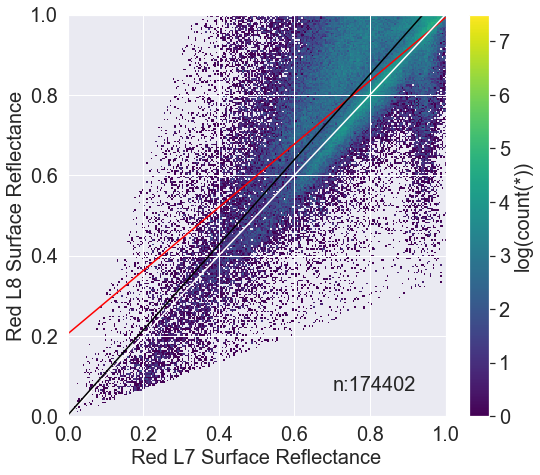

OLS: 
y=0.7877x+0.2048
OLS_r:0.74, p:0.000, n:174402
RMA: 
y=1.0610x+0.0022
RMA_r:0.74
RMSE is 0.1325


In [40]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L7.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L7.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L7.values, df.L8.values, _method_type_2="reduced major axis")


fig, ax = plt.subplots(figsize=(8,7))
sns.set_theme(style="darkgrid")
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L7, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=7.5,
    xlabel='Red L7 Surface Reflectance', ylabel='Red L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/L7L8/Red.jpg', dpi=300) 

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L7.values, squared=False)))


In [41]:
# sns.residplot(x=df.L7.values, y=df.L8.values)

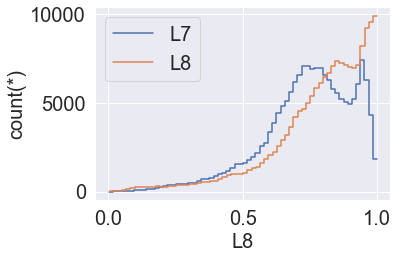

In [42]:
df.viz.histogram(x=df.L7, label='L7')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

nir

In [43]:
folderPath = r"/data/shunan/data/harmonize_data/201305_08landsat/nir"
L8, L7 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L7': L7})
df = vx.from_pandas(df)
del L7,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


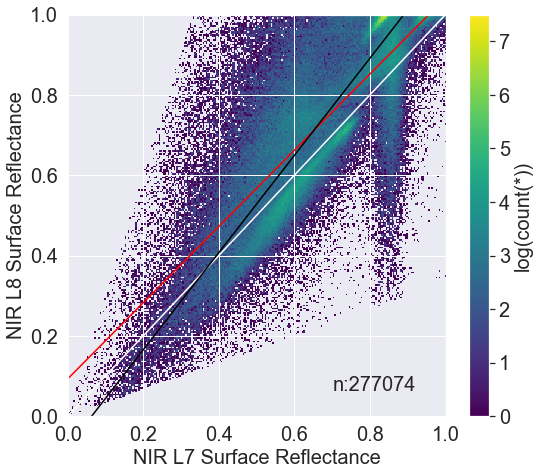

OLS: 
y=0.9487x+0.0928
OLS_r:0.78, p:0.000, n:277074
RMA: 
y=1.2100x+-0.0768
RMA_r:0.78
RMSE is 0.1432


In [44]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L7.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L7.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L7.values, df.L8.values, _method_type_2="reduced major axis")


fig, ax = plt.subplots(figsize=(8,7))
sns.set_theme(style="darkgrid")
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L7, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=7.5,
    xlabel='NIR L7 Surface Reflectance', ylabel='NIR L8 Surface Reflectance')
ax.set_aspect('equal', 'box')
fig.savefig(r'print/L7L8/Nir.jpg', dpi=300)   

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L7.values, squared=False)))


In [45]:
# sns.residplot(x=df.L7.values, y=df.L8.values)

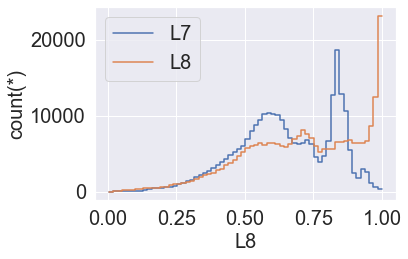

In [46]:
df.viz.histogram(x=df.L7, label='L7')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

swir1

In [47]:
folderPath = r"/data/shunan/data/harmonize_data/201305_08landsat/swir1"
L8, L7 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L7': L7})
df = vx.from_pandas(df)
del L7,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


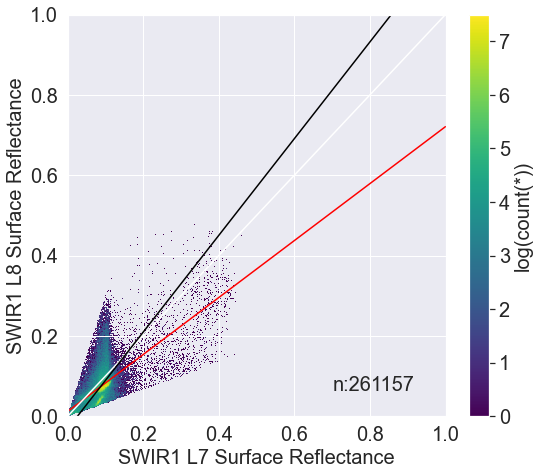

OLS: 
y=0.7091x+0.0119
OLS_r:0.59, p:0.000, n:261157
RMA: 
y=1.2039x+-0.0314
RMA_r:0.59
RMSE is 0.0361


In [48]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L7.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L7.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L7.values, df.L8.values, _method_type_2="reduced major axis")


fig, ax = plt.subplots(figsize=(8,7))
sns.set_theme(style="darkgrid")
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L7, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=7.5,
    xlabel='SWIR1 L7 Surface Reflectance', ylabel='SWIR1 L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/L7L8/SWIR1.jpg', dpi=300)  

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L7.values, squared=False)))


In [49]:
# sns.residplot(x=df.L7.values, y=df.L8.values)

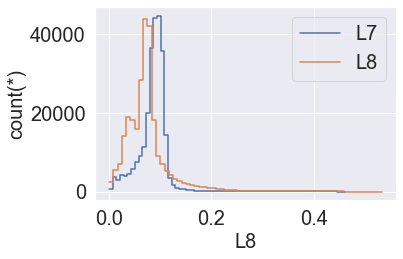

In [50]:
df.viz.histogram(x=df.L7, label='L7')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()

swir2

In [51]:
folderPath = r"/data/shunan/data/harmonize_data/201305_08landsat/swir2"
L8, L7 = getBand(folderPath)
df = pd.DataFrame({'L8': L8, 'L7': L7})
df = vx.from_pandas(df)
del L7,L8

/software/anaconda3/envs/earth/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: divide by zero encountered in log
  result = function(*numpy_data, **kwargs)


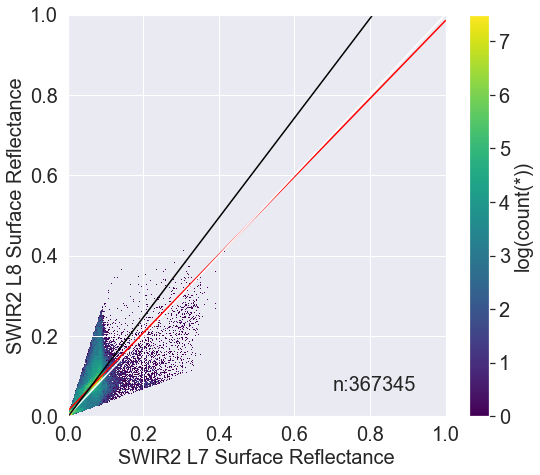

OLS: 
y=0.9720x+0.0130
OLS_r:0.78, p:0.000, n:367345
RMA: 
y=1.2402x+-0.0022
RMA_r:0.78
RMSE is 0.0309


In [52]:
# plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df.L7.values, df.L8.values)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df.L8.values, df.L7.values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(L7),np.log(L8))

# Compute regression type 2
rma_results = regress2(df.L7.values, df.L8.values, _method_type_2="reduced major axis")


fig, ax = plt.subplots(figsize=(8,7))
sns.set_theme(style="darkgrid")
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "Arial"

# plot regression model
plt.plot(np.array([0,1]), slope * np.array([0,1]) + intercept, color='red') # ols regression etm+ vs oli
plt.plot([0,1], [0,1], color = 'white') # reference line
# plt.plot(np.array([0,1]), (np.array([0,1]) - intercept1) / slope1 + intercept, color='peru') # ols regression oli vs etm+ 
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.axis('equal')
k = rma_results['slope']
b = rma_results['intercept'] 
plt.plot(np.array([0,1]), k * np.array([0,1]) + b, color='black') # rma regression

ax.annotate('n:%.0f' % (len(df.L8.values)), xy=(0.7, 0.1),  xycoords='data',
            horizontalalignment='left', verticalalignment='top',
            )

# scatter plot
df.viz.heatmap(df.L7, df.L8, what=np.log(vx.stat.count()), show=True, colormap="viridis", vmin=0.0, vmax=7.5,
    xlabel='SWIR2 L7 Surface Reflectance', ylabel='SWIR2 L8 Surface Reflectance')
ax.set_aspect('equal', 'box')    
fig.savefig('print/L7L8/SWIR2.jpg', dpi=300)      

print('OLS: \ny={0:.4f}x+{1:.4f}\nOLS_r:{2:.2f}, p:{3:.3f}, n:{4:.0f}'.format(slope,intercept,r_value,p_value, len(df.L8.values)))
print('RMA: \ny={0:.4f}x+{1:.4f}\nRMA_r:{2:.2f}'.format(k,b, rma_results['r']))
print('RMSE is %.4f' % (mean_squared_error(df.L8.values, df.L7.values, squared=False)))


In [53]:
# sns.residplot(x=df.L7.values, y=df.L8.values)

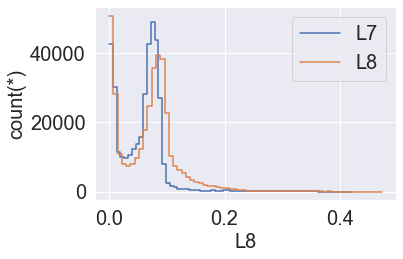

In [54]:
df.viz.histogram(x=df.L7, label='L7')   
df.viz.histogram(x=df.L8, label='L8')   
plt.legend()